In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

#import librosa
#import librosa.display

import torch
import torchaudio
from scipy import signal

In [2]:
train = pd.read_csv('data/train_clean.csv', dtype={'time': np.float32, 'signal': np.float32, 'open_channels':np.int32})
test  = pd.read_csv('data/test_clean.csv',  dtype={'time': np.float32, 'signal': np.float32})
sub   = pd.read_csv('data/sample_submission.csv', dtype={'time': np.float32})

In [3]:
tr0 = train[      0: 500000]
tr1 = train[ 500000:1000000]
tr2 = train[1000000:1500000]
tr3 = train[1500000:2000000]
tr4 = train[2000000:2500000]
tr5 = train[2500000:3000000]
tr6 = train[3000000:3500000]
tr7 = train[3500000:4000000]
tr8 = train[4000000:4500000]
tr9 = train[4500000:5000000]

te0 = test[      0: 500000]
te1 = test[ 500000:1000000]
te2 = test[1000000:1500000]
te3 = test[1500000:2000000]

assert(len(train) == len(tr0)+len(tr1)+len(tr2)+len(tr3)+len(tr4)+len(tr5)+len(tr6)+len(tr7)+len(tr8)+len(tr9))
assert(len(test)  == len(te0)+len(te1)+len(te2)+len(te3))

In [4]:
tr0_tensor = torch.tensor(tr0["signal"].values)
tr1_tensor = torch.tensor(tr1["signal"].values)
tr2_tensor = torch.tensor(tr2["signal"].values)
tr3_tensor = torch.tensor(tr3["signal"].values)
tr4_tensor = torch.tensor(tr4["signal"].values)
tr5_tensor = torch.tensor(tr5["signal"].values)
tr6_tensor = torch.tensor(tr6["signal"].values)
tr7_tensor = torch.tensor(tr7["signal"].values)
tr8_tensor = torch.tensor(tr8["signal"].values)
tr9_tensor = torch.tensor(tr9["signal"].values)

In [5]:
array = np.arange(1000)
def dynamic_plot(idx):
    plt.figure(figsize=(18, 8))
    plt.ylim(-1,10)
    #plt.plot(array[idx:idx+100]);
    (train[idx:idx+250]["signal"]+2).plot.line();
    train[idx:idx+250]["open_channels"].plot.line();

# a = IntSlider(value=0, min=0, max=50000, step=100)
#interact(dynamic_plot, idx=(0,5000000,250))

# Spectrogram

In [6]:
tr = tr4_tensor

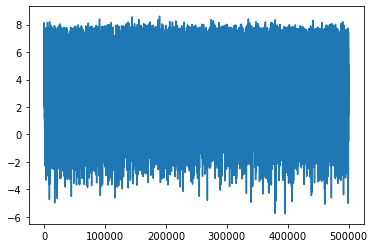

In [7]:
plt.plot(tr);

Shape:  torch.Size([11, 50001])


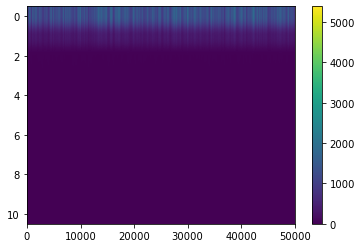

In [11]:
specgram = torchaudio.transforms.Spectrogram(n_fft=20)(tr)

print("Shape: ", specgram.shape)

plt.imshow(specgram[:,:], aspect='auto'); plt.colorbar();

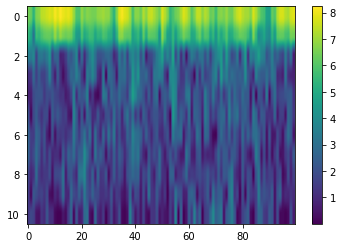

In [29]:
plt.imshow(specgram[:,1000:1100].log1p(), aspect='auto'); plt.colorbar();

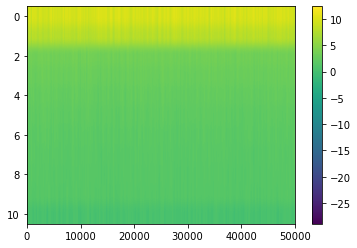

In [13]:
plt.imshow(specgram.log2(), aspect='auto'); plt.colorbar();

# Mel Spectrogram 

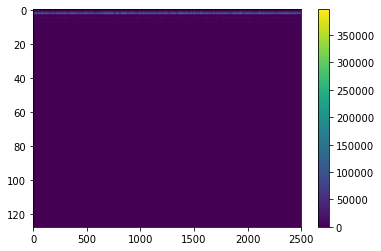

In [14]:
mel_specgram = torchaudio.transforms.MelSpectrogram()(tr)

plt.imshow(mel_specgram, aspect='auto'); plt.colorbar();

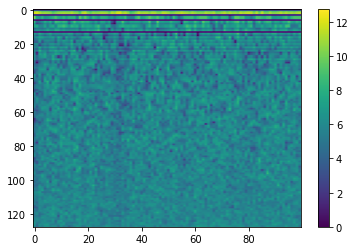

In [28]:
plt.imshow(mel_specgram[:,1000:1100].log1p(), aspect='auto'); plt.colorbar();

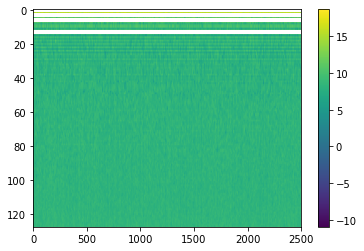

In [22]:
plt.imshow(mel_specgram.log2(), aspect='auto'); plt.colorbar();

# MFCC

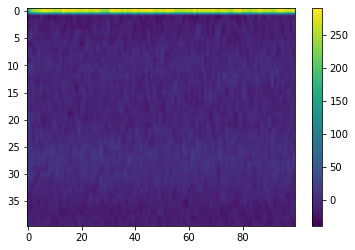

In [25]:
mfcc = torchaudio.transforms.MFCC()(tr)

plt.imshow(mfcc[:,:100], aspect='auto'); plt.colorbar();

# Scalogram

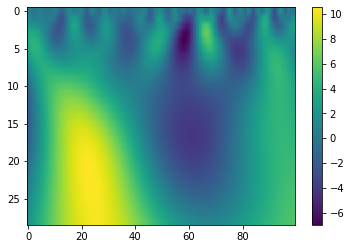

In [35]:
scalogram = signal.cwt(data=tr4["signal"].values, wavelet=signal.ricker, widths=np.arange(1, 30))
plt.imshow(scalogram[:,1000:1100], aspect='auto'); plt.colorbar();

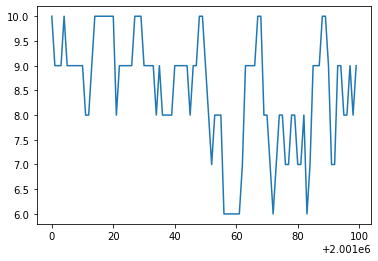

In [32]:
#tr7["signal"].values
tr4[1000:1100]["open_channels"].plot.line();